# Stock Trend Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt 
import pandas_datareader as data


In [2]:
start='2010-01-01'
end = '2022-07-30'
df= data.DataReader('AAPL','yahoo',start,end)
df.head()                             

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-25,155.039993,152.279999,154.009995,152.949997,53623900.0,152.737839
2022-07-26,153.089996,150.800003,152.259995,151.600006,55138700.0,151.389725
2022-07-27,157.330002,152.160004,152.580002,156.789993,78620700.0,156.572510
2022-07-28,157.639999,154.410004,156.979996,157.350006,81378700.0,157.131744
2022-07-29,163.630005,159.500000,161.240005,162.509995,101689200.0,162.284576


In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [5]:
df = df.drop(['Date','Adj Close'],axis=1)


In [6]:
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


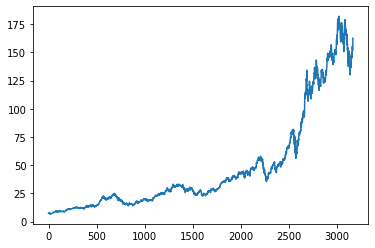

In [7]:
plt.plot(df.Close)

In [8]:
MA100 = df.Close.rolling(100).mean()
MA100.head(102)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
97          NaN
98          NaN
99     8.079250
100    8.091171
101    8.105221
Name: Close, Length: 102, dtype: float64

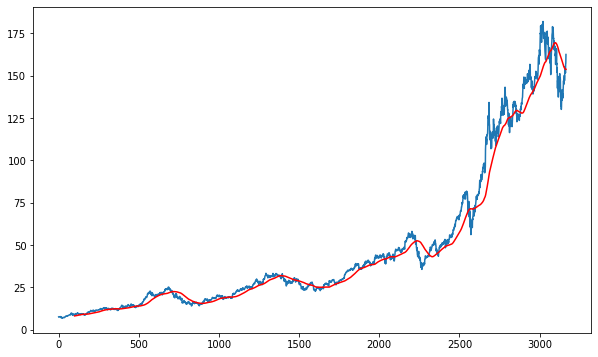

In [9]:
plt.figure(figsize = (10,6))
plt.plot(df.Close)
plt.plot(MA100 , 'r')

In [10]:
MA200 = df.Close.rolling(200).mean()
MA200.head(200)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
195         NaN
196         NaN
197         NaN
198         NaN
199    8.748043
Name: Close, Length: 200, dtype: float64

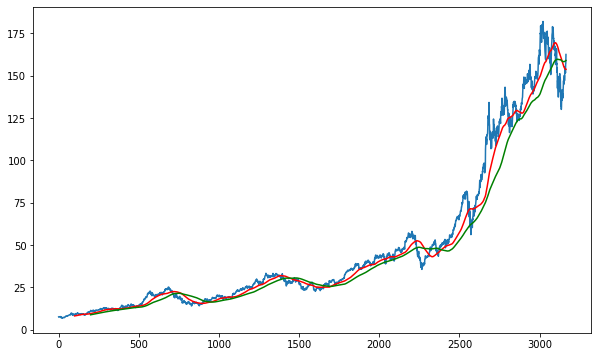

In [11]:
plt.figure(figsize = (10,6))
plt.plot(df.Close)
plt.plot(MA100 , 'r')
plt.plot(MA200 , 'g')

In [12]:
df.shape

(3166, 5)

In [13]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.80) : int(len(df))])

In [14]:
print(data_train.shape)
print(data_test.shape)

(2532, 1)
(634, 1)


In [15]:
data_test.head()

,Close
2532,79.577499
2533,77.237503
2534,79.422501
2535,81.084999
2536,80.967499


In [16]:
data_test.head()

,Close
2532,79.577499
2533,77.237503
2534,79.422501
2535,81.084999
2536,80.967499


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.00914537],
       [0.0107512 ],
       [0.01093235],
       ...,
       [0.99088398],
       [0.99475658],
       [1.        ]])

In [19]:
X_train = []
Y_train = []

for i in range(100,data_train_array.shape[0]):
    X_train.append(data_train_array[i-100 : i])
    Y_train.append(data_train_array[i,0])
    
# print(X_train)
# print(Y_train)

X_train , Y_train = np.array(X_train), np.array(Y_train)

In [20]:
print(X_train.shape)
print(Y_train.shape)

(2432, 100, 1)
(2432,)


# LSTM Model

In [21]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))




model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
          



model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
          
          

          
          
model.add(LSTM(units=120,activation='relu',return_sequences=True))
model.add(Dropout(0.5))
          

model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 120)          9

In [24]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(X_train, Y_train , epochs = 50)

Epoch 1/50
76/76 [==============================] - 24s 256ms/step - loss: 0.0491
Epoch 2/50
76/76 [==============================] - 19s 256ms/step - loss: 0.0410
Epoch 3/50
76/76 [==============================] - 19s 254ms/step - loss: 0.0403
Epoch 4/50
76/76 [==============================] - 18s 241ms/step - loss: 0.0402
Epoch 5/50
76/76 [==============================] - 18s 241ms/step - loss: 0.0396
Epoch 6/50
76/76 [==============================] - 18s 241ms/step - loss: 0.0394
Epoch 7/50
76/76 [==============================] - 18s 236ms/step - loss: 0.0393
Epoch 8/50
76/76 [==============================] - 19s 247ms/step - loss: 0.0390
Epoch 9/50
76/76 [==============================] - 20s 268ms/step - loss: 0.0391
Epoch 10/50
76/76 [==============================] - 18s 239ms/step - loss: 0.0389
Epoch 11/50
76/76 [==============================] - 19s 253ms/step - loss: 0.0389
Epoch 12/50
76/76 [==============================] - 19s 244ms/step - loss: 0.0388
Epoch 13/50
7

In [32]:
model.save('keras_model.h5')

In [33]:
past_100_days = data_train.tail(100)

In [34]:
final_df = past_100_days.append(data_test , ignore_index = True)

In [35]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(734, 1)

In [76]:
X_test = []
Y_test = []

for i in range(100,input_data.shape[0]):
    X_test.append(input_data[i-100 : i])
    Y_test.append(input_data[i,0])
    




In [77]:
X_test , Y_test = np.array(X_test), np.array(Y_test)

In [78]:
print(X_test.shape)
print(Y_test.shape)

(634, 100, 1)
(634,)


## Prediction

In [91]:
Y_predicted = model.predict(X_test)

20/20 [==============================] - 1s 71ms/step


In [92]:
print(Y_predicted.shape)
print(Y_test.shape)

(634, 100, 1)
(634,)


In [70]:
Y_predicted

array([[[0.2955863 ],
        [0.297739  ],
        [0.29732624],
        ...,
        [0.29583332],
        [0.2958334 ],
        [0.2958335 ]],

       [[0.2955734 ],
        [0.2977303 ],
        [0.29732   ],
        ...,
        [0.2958334 ],
        [0.2958335 ],
        [0.29583356]],

       [[0.2955882 ],
        [0.29773974],
        [0.29732653],
        ...,
        [0.2958335 ],
        [0.2958336 ],
        [0.29583362]],

       ...,

       [[0.2992525 ],
        [0.30208912],
        [0.30234057],
        ...,
        [0.30465326],
        [0.30474207],
        [0.3048226 ]],

       [[0.29924506],
        [0.30206358],
        [0.30230033],
        ...,
        [0.30474207],
        [0.3048226 ],
        [0.3049017 ]],

       [[0.29923537],
        [0.30204928],
        [0.30230314],
        ...,
        [0.3048226 ],
        [0.3049017 ],
        [0.3049823 ]]], dtype=float32)

In [83]:
scaler=scaler.scale_

In [85]:
scale_factor = 1/scaler[0]
Y_predicted = Y_predicted * scale_factor
Y_test = Y_test * scale_factor

ValueError: x and y can be no greater than 2D, but have shapes (634,) and (634, 100, 1)

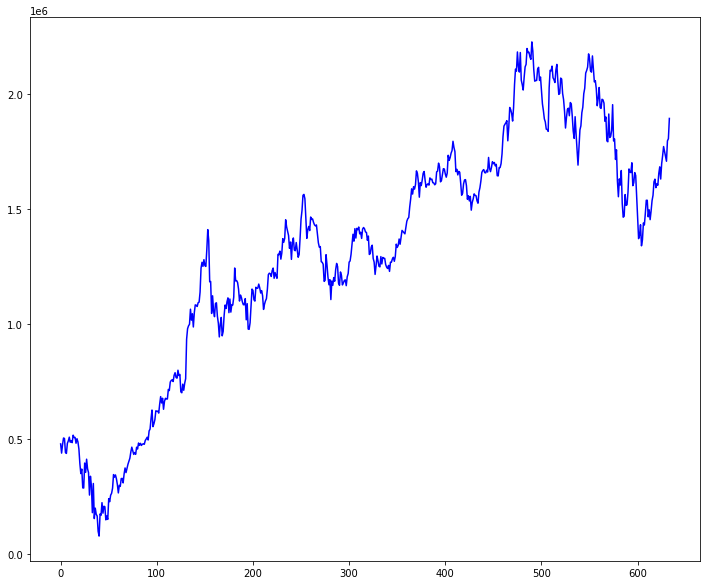

In [86]:
plt.figure(figsize=(12,10))
plt.plot(Y_test , 'b' , label = 'Original Price')
plt.plot(Y_predicted , 'r' , label = 'Predicted Price')
plt.xlabel('Time')
plt.ylebel('Price')
plt.legend()
plt.show()